<div align="center" style="background-color:#f2f2f2; padding:10px; border-radius: 20px">
  <h1 style="color:#990000; font-size: 40px; font-weight: bold;">Salt & Pepper Noise Removal</h1>
</div>

Salt and pepper noise is an impulse type of noise in images which is generally caused by errors in data transmission, failure in memory cell or analog-to-digital converter errors. It takes the form of randomly occurring white and black pixels, which can significantly deteriorate the quality of an image.

In this notebook, we'll experiment with `Simple Blur`, `Gaussian Blur`, and `Median Blur` to eliminate salt and pepper noise from images. We'll explore how each method works and compare their results to determine the most effective approach. Let's enhance those pictures! 🚀

In [2]:
# importing the dependencies

import os
import cv2
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import kagglehub

# Organizing the Images

In this section, we'll structure our dataset to neatly store file paths for both the actual images and their noisy counterparts. This streamlined approach ensures smooth data processing and analysis of our images as we progress through the notebook.

In [ ]:
salt_and_pepper_noise_images = kagglehub.dataset_download('rajneesh231/salt-and-pepper-noise-images')

print('Data source import complete.')

In [8]:
# creating the dataset

data = {'actual_img': [], 'noisy_img': []}

gt_folder = os.path.join(salt_and_pepper_noise_images, 'Ground_truth')
noisy_folder = os.path.join(salt_and_pepper_noise_images, 'Noisy_folder')

gt_files = sorted(os.listdir(gt_folder))
noisy_files = sorted(os.listdir(noisy_folder))

for gt_file, noisy_file in zip(gt_files, noisy_files):
    gt_filepath = os.path.join(gt_folder, gt_file)
    noisy_filepath = os.path.join(noisy_folder, noisy_file)

    data['actual_img'].append(gt_filepath)
    data['noisy_img'].append(noisy_filepath)

dataset = pd.DataFrame(data)
dataset.head()

actual_img  \
0  /root/.cache/kagglehub/datasets/rajneesh231/sa...   
1  /root/.cache/kagglehub/datasets/rajneesh231/sa...   
2  /root/.cache/kagglehub/datasets/rajneesh231/sa...   
3  /root/.cache/kagglehub/datasets/rajneesh231/sa...   
4  /root/.cache/kagglehub/datasets/rajneesh231/sa...   

                                           noisy_img  
0  /root/.cache/kagglehub/datasets/rajneesh231/sa...  
1  /root/.cache/kagglehub/datasets/rajneesh231/sa...  
2  /root/.cache/kagglehub/datasets/rajneesh231/sa...  
3  /root/.cache/kagglehub/datasets/rajneesh231/sa...  
4  /root/.cache/kagglehub/datasets/rajneesh231/sa...

# Visualizing Images and Cleaning Noise

In this section, we'll explore image visualization and apply three blurring techniques:
- `Simple Blur` --> `cv2.blur()`
- `Gaussian Blur` --> `cv2.GaussianBlur()`
- `Median Blur` --> `cv2.medianBlur()`

These techniques help smooth out images and remove unwanted noise, resulting in clearer and more appealing visuals. To know more about the blurring techniques, you can check out this [documentation](https://docs.opencv.org/4.x/d4/d13/tutorial_py_filtering.html).

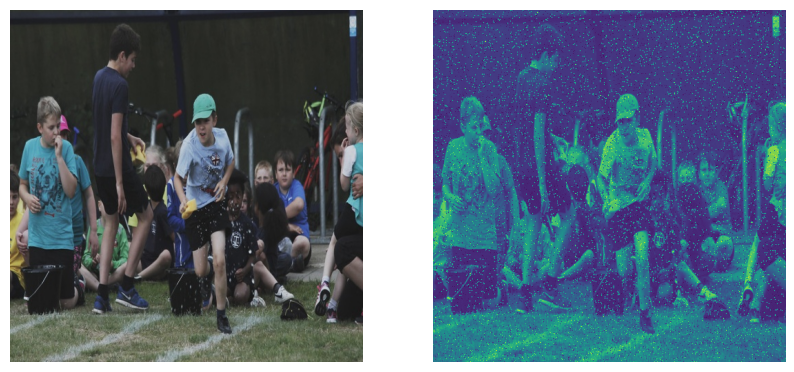

CPU times: user 337 ms, sys: 111 ms, total: 448 ms
Wall time: 332 ms


In [15]:
%%time

# plotting original image and noisy counterpart

RAND_SAMPLE = random.randint(0, len(dataset) - 1)

fig, axes = plt.subplots(1, 2, figsize = (10, 5))

actual_img = plt.imread(dataset['actual_img'][RAND_SAMPLE])
noisy_img = plt.imread(dataset['noisy_img'][RAND_SAMPLE])

axes[0].imshow(actual_img)
axes[0].axis('off')

axes[1].imshow(noisy_img)
axes[1].axis('off')

plt.show()

In [16]:
# class for removing noise from images

class NoiseRemoval:
    def __init__(self, path):
        self.path = path

    def simple(self, k_size):
        return cv2.blur(cv2.imread(self.path), (k_size, k_size))

    def gaussian(self, k_size, threshold):
        return cv2.GaussianBlur(cv2.imread(self.path), (k_size, k_size), threshold)

    def median(self, threshold):
        return cv2.medianBlur(cv2.imread(self.path), threshold)

In [17]:
# setting up the path variable

path = dataset['noisy_img'][RAND_SAMPLE]

# initializing NoiseRemoval object with the specified path

noise_removal = NoiseRemoval(path)

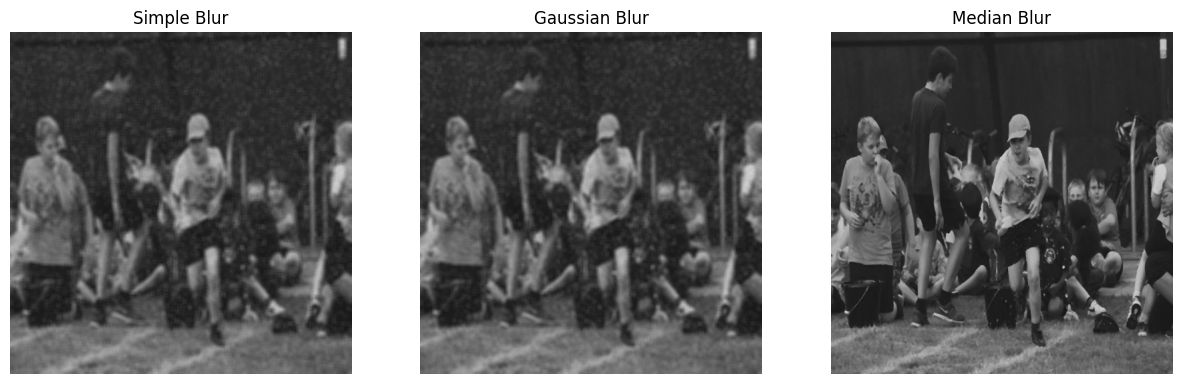

CPU times: user 680 ms, sys: 54.6 ms, total: 735 ms
Wall time: 742 ms


In [18]:
%%time

# comparing the three different blurring techniques

fig, axes = plt.subplots(1, 3, figsize = (15, 5))

simple_corrected_noisy_img = noise_removal.simple(7)
gaussian_corrected_noisy_img = noise_removal.gaussian(7, 5)
median_corrected_noisy_img = noise_removal.median(3)

axes[0].imshow(simple_corrected_noisy_img)
axes[0].set_title('Simple Blur')
axes[0].axis('off')

axes[1].imshow(gaussian_corrected_noisy_img)
axes[1].set_title('Gaussian Blur')
axes[1].axis('off')

axes[2].imshow(median_corrected_noisy_img)
axes[2].set_title('Median Blur')
axes[2].axis('off')

plt.show()

After analyzing the outcomes, it's apparent that the `Median Blur` consistently yields clearer images in comparison to both `Simple Blur` and `Gaussian Blur` techniques. This enhanced clarity arises from the `Median Blur`'s operation, which involves computing the median value of all pixels within the kernel window. By replacing the central pixel with this calculated median value, the Median Blur excels in effectively eliminating salt-and-pepper noise, resulting in remarkably improved image quality.

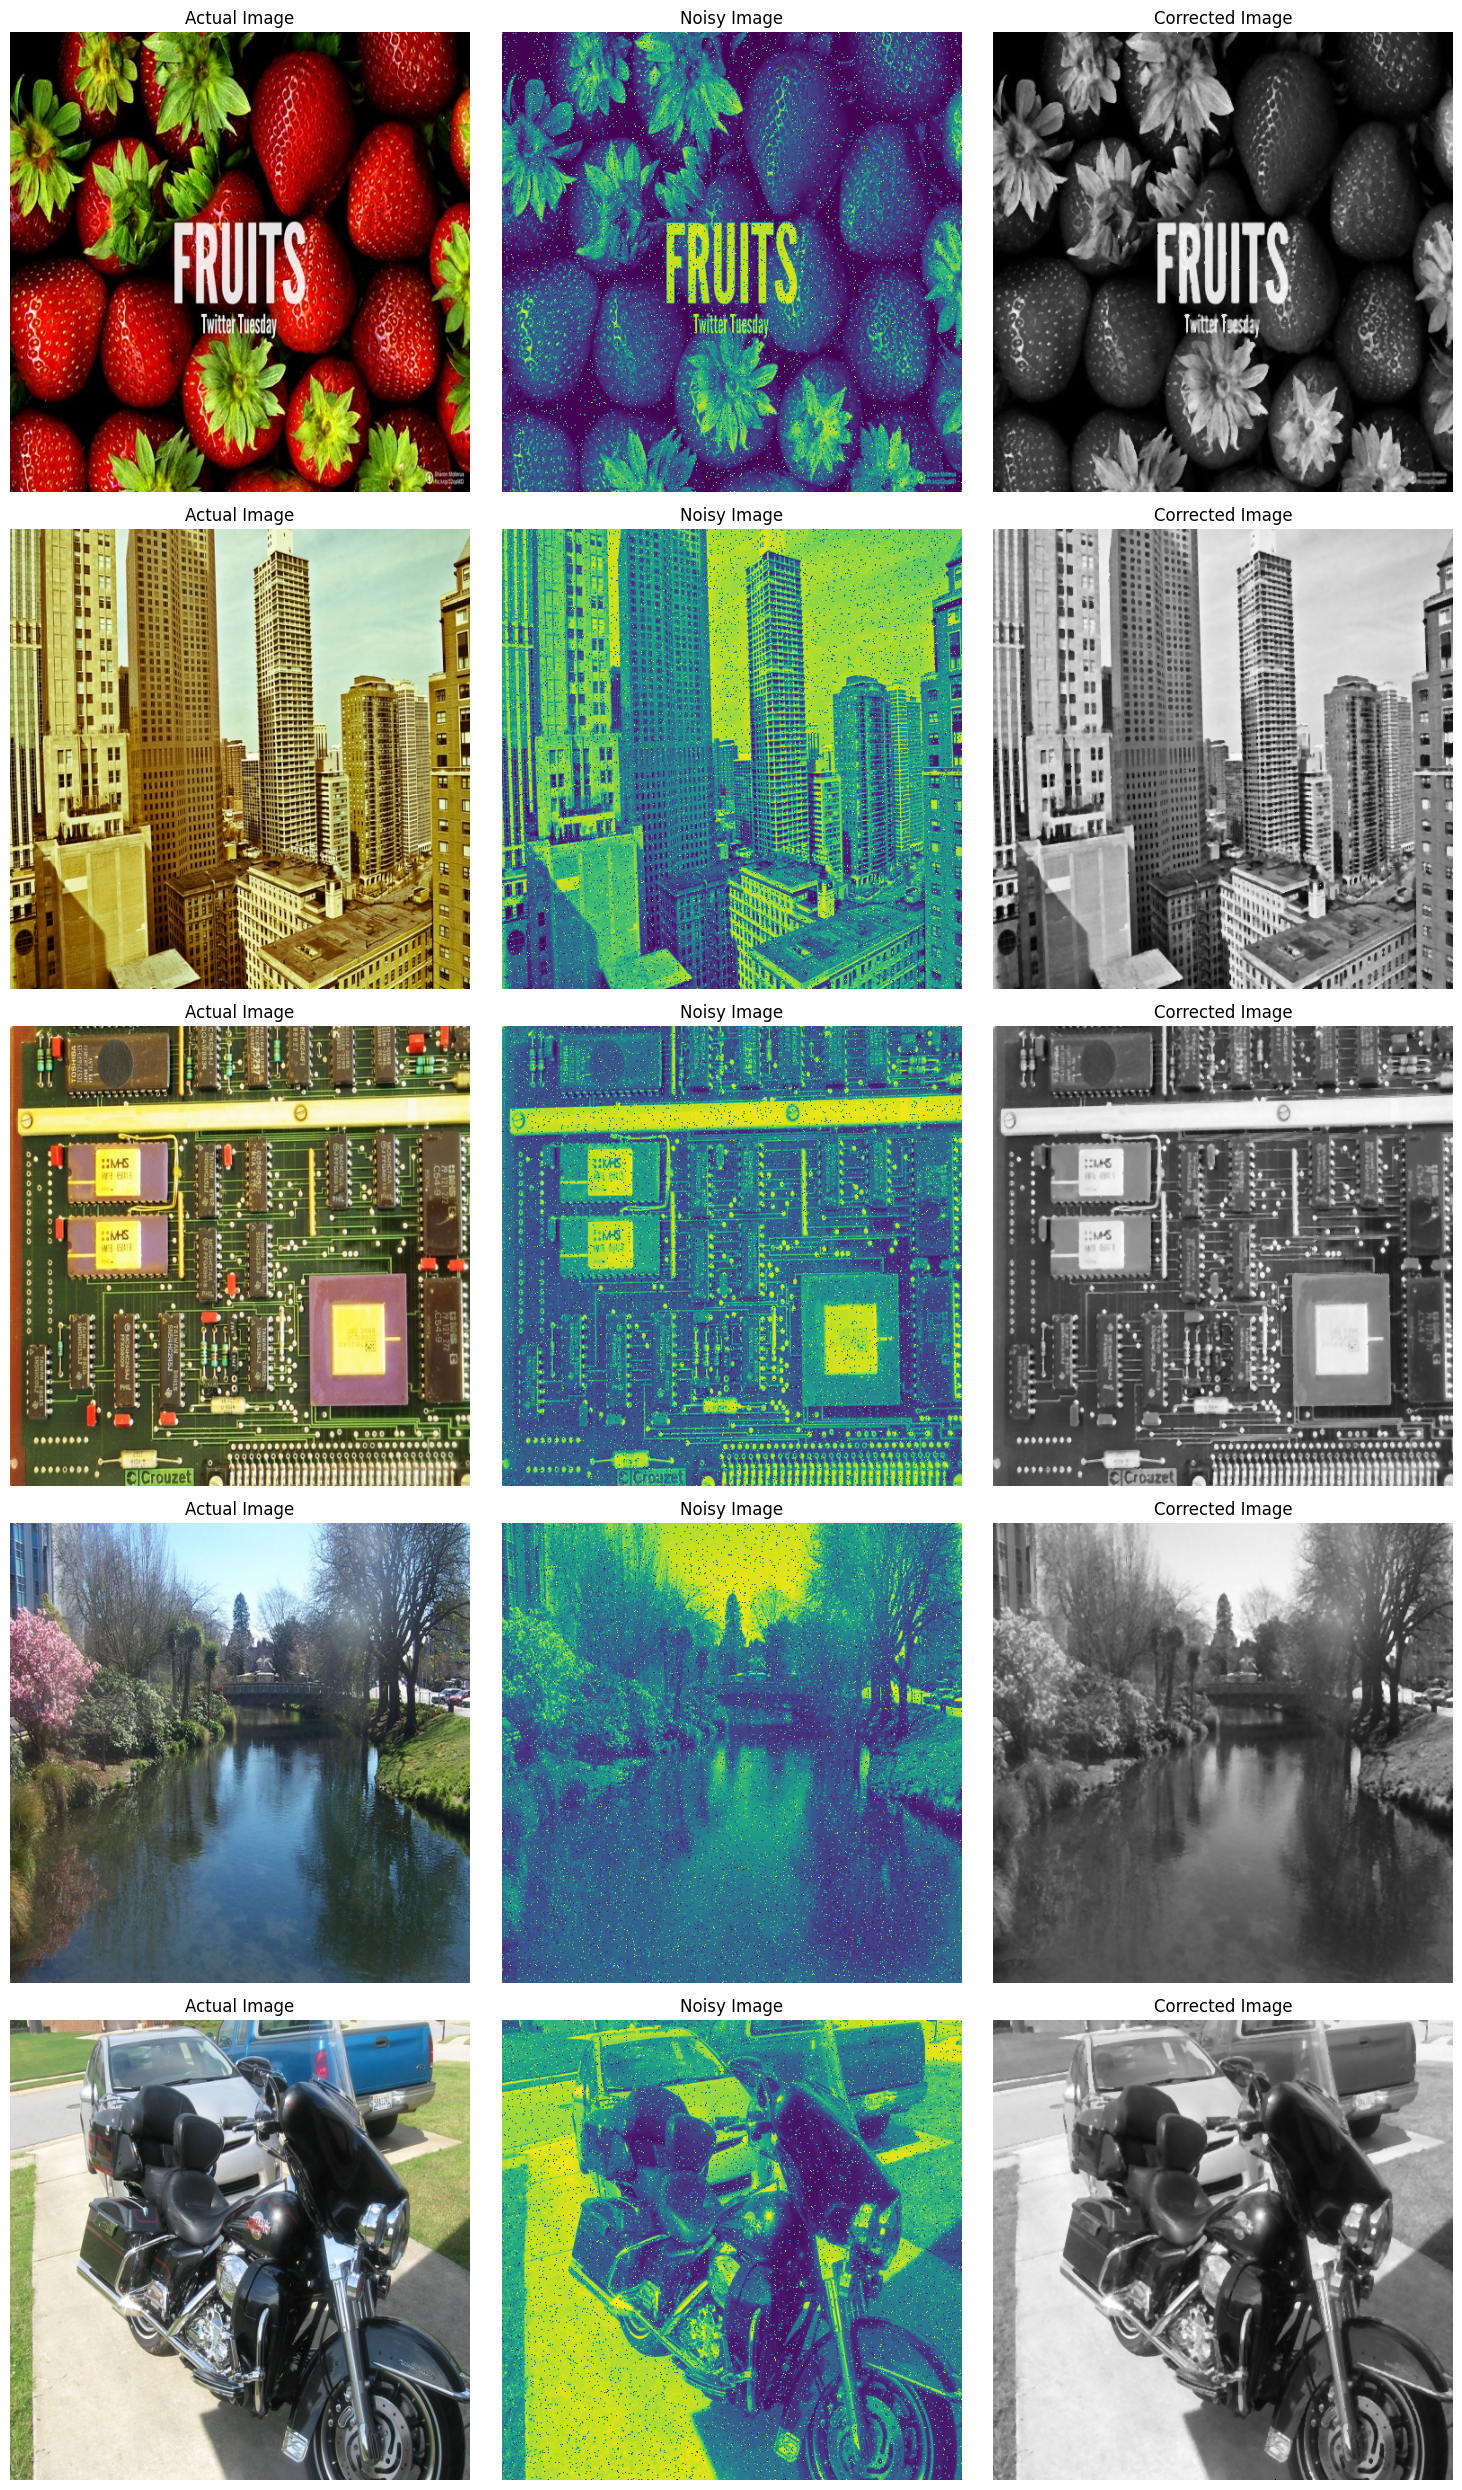

CPU times: user 3.9 s, sys: 259 ms, total: 4.16 s
Wall time: 4.07 s


In [13]:
%%time

# displaying actual, noisy, and corrected images using cv2.medianBlur()

num_rows = 5
num_cols = 3

fig, axes = plt.subplots(num_rows, num_cols, figsize = (15, 5*num_rows))

for i in range(num_rows):
    RAND_SAMPLE = random.randint(0, len(dataset['actual_img']) - 1)
    noise_removal = NoiseRemoval(dataset['noisy_img'][RAND_SAMPLE])

    actual_img = plt.imread(dataset['actual_img'][RAND_SAMPLE])
    noisy_img = plt.imread(dataset['noisy_img'][RAND_SAMPLE])
    corrected_img = noise_removal.median(3)

    axes[i, 0].imshow(actual_img)
    axes[i, 0].set_title('Actual Image')
    axes[i, 0].axis('off')

    axes[i, 1].imshow(noisy_img)
    axes[i, 1].set_title('Noisy Image')
    axes[i, 1].axis('off')

    axes[i, 2].imshow(corrected_img)
    axes[i, 2].set_title('Corrected Image')
    axes[i, 2].axis('off')

plt.tight_layout()
plt.show()